In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [2]:
path = "D:\\MeasurementsNew\\"
files = glob.glob(path + "*.txt")
files

['D:\\MeasurementsNew\\M2LagerschadL4Nm.txt',
 'D:\\MeasurementsNew\\M2LagerschadL8Nm.txt',
 'D:\\MeasurementsNew\\M2LagerschadS4Nm.txt',
 'D:\\MeasurementsNew\\M2LagerschadS8Nm.txt',
 'D:\\MeasurementsNew\\M3GutMessL4Nm.txt',
 'D:\\MeasurementsNew\\M3GutMessL8Nm.txt',
 'D:\\MeasurementsNew\\M3GutMessS4Nm.txt',
 'D:\\MeasurementsNew\\M3GutMessS8Nm.txt',
 'D:\\MeasurementsNew\\M3_2GutMessL4Nm.txt',
 'D:\\MeasurementsNew\\M3_2GutMessL8Nm.txt',
 'D:\\MeasurementsNew\\M3_2GutMessS4Nm.txt',
 'D:\\MeasurementsNew\\M3_2GutMessS8Nm.txt',
 'D:\\MeasurementsNew\\M4ErhZahneingrL4Nm.txt',
 'D:\\MeasurementsNew\\M4ErhZahneingrL8Nm.txt',
 'D:\\MeasurementsNew\\M4ErhZahneingrS4Nm.txt',
 'D:\\MeasurementsNew\\M4ErhZahneingrS8Nm.txt',
 'D:\\MeasurementsNew\\M5SchmutzRitzL4Nm.txt',
 'D:\\MeasurementsNew\\M5SchmutzRitzL8Nm.txt',
 'D:\\MeasurementsNew\\M5SchmutzRitzS4Nm.txt',
 'D:\\MeasurementsNew\\M5SchmutzRitzS8Nm.txt',
 'D:\\MeasurementsNew\\M6SchmutzStangeL4Nm.txt',
 'D:\\MeasurementsNew\\M6SchmutzSta

C:\Users\z003zxuz\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


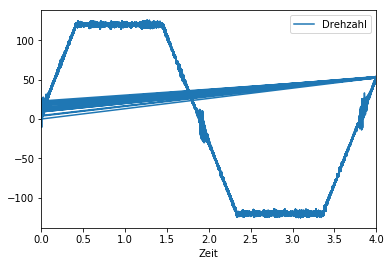

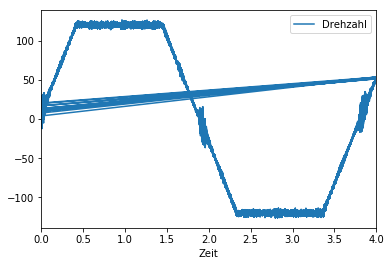

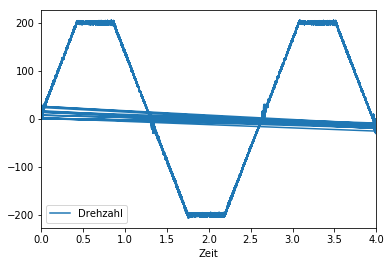

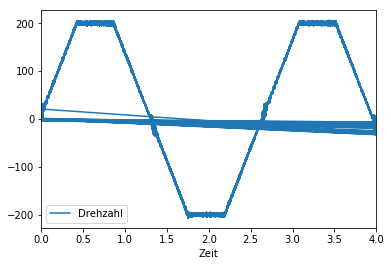

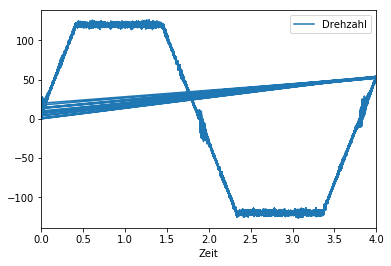

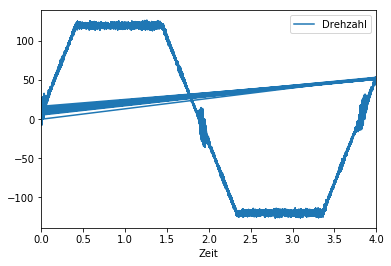

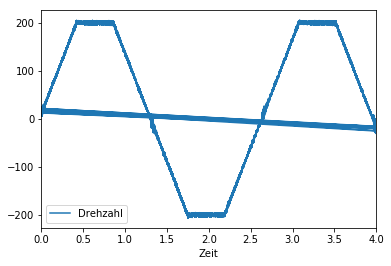

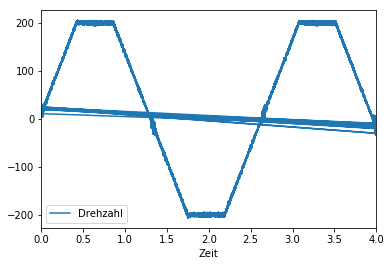

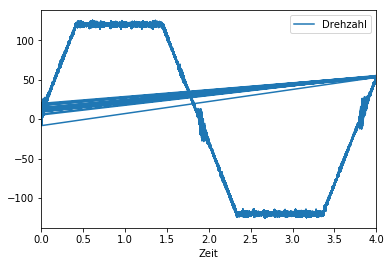

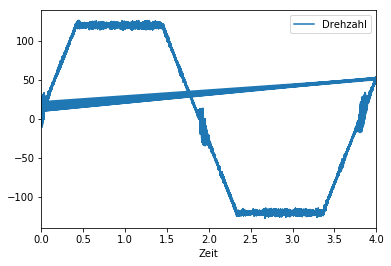

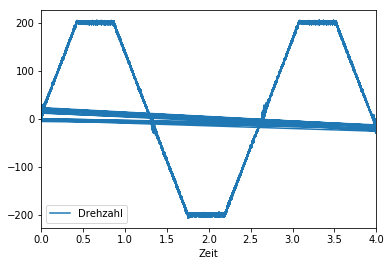

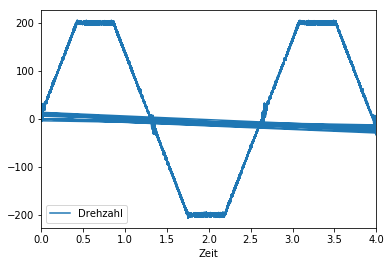

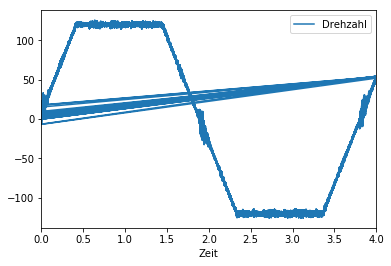

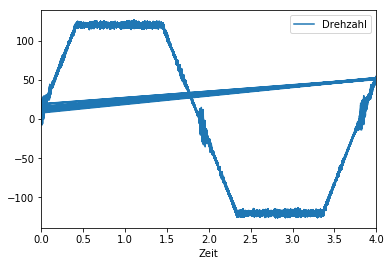

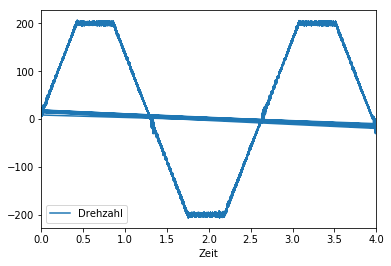

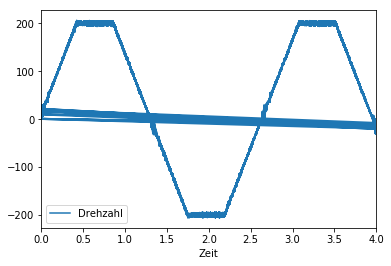

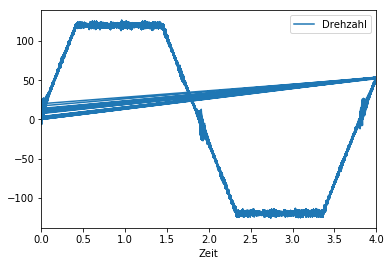

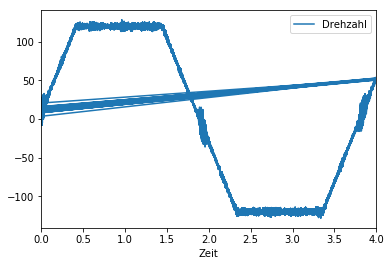

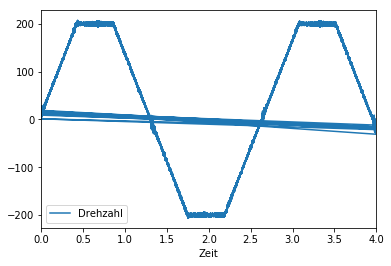

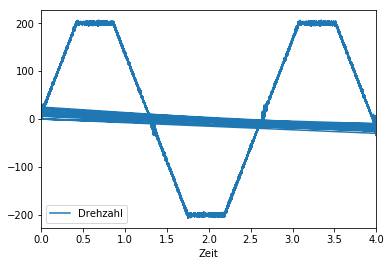

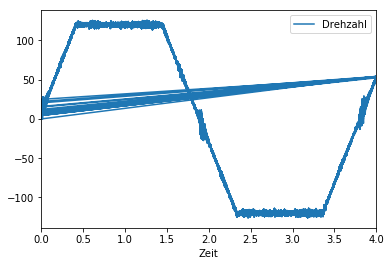

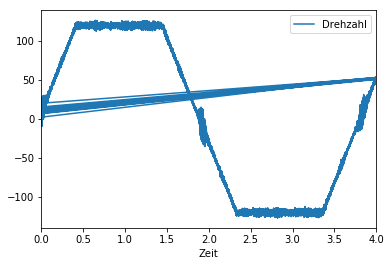

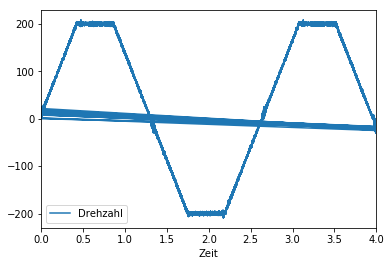

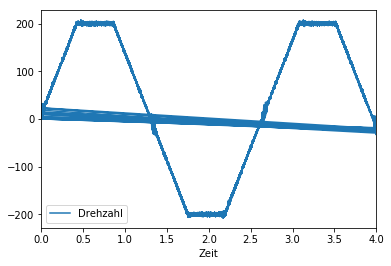

In [11]:
# for file in files:
#     df = pd.read_csv(file)
#     df.plot(x = 'Zeit', y = 'Drehzahl')

In [3]:
df = pd.read_csv('D:\\MeasurementsNew\\M5SchmutzRitzL4Nm.txt')

In [20]:
df_sample = df[0:50]

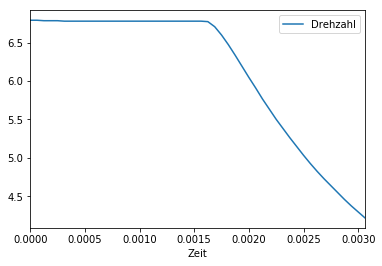

In [21]:
df_sample.plot(x = 'Zeit', y = 'Drehzahl')

In [22]:
index = pd.date_range('1/1/2000', periods=50, freq='0.0000625S')

In [25]:
df_sample.set_index(index, inplace=True)
df_sample.describe()

,Zeit,Drehzahl,NRegeldiff,StromGegl,Lage,Lagediff,Schleppabstand,Drehmoment,MX
count,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.0
mean,0.001531,6.122040,-1.201200,-1.058920,8.0,0.160000,0.160000,-2.171290,0.0
std,0.000911,0.894721,2.680231,0.174376,0.0,0.370328,0.370328,0.511853,0.0
min,0.000000,4.218000,-4.506000,-1.361900,8.0,0.000000,0.000000,-2.700800,0.0
25%,0.000766,5.412000,-2.742000,-1.196275,8.0,0.000000,0.000000,-2.652625,0.0
50%,0.001531,6.780000,-2.742000,-1.067450,8.0,0.000000,0.000000,-2.325750,0.0
75%,0.002297,6.780000,0.516000,-0.930475,8.0,0.000000,0.000000,-1.780375,0.0
max,0.003063,6.792000,3.750000,-0.717500,8.0,1.000000,1.000000,-0.988700,0.0


In [30]:
data = []
speed = []
torque = []
N = 20
series_length = 50

In [ ]:
df = pd.read_csv('D:\\MeasurementsNew\\M5SchmutzRitzL4Nm.txt')
speed_temp = []
torque_temp = []
for i in range(N * (64000 // series_length)):
    #print("Step %d/%d" %(i, N * (64000 // series_length)))
    df_sample = df[0 + i*50:50 + i*50]
    index = pd.date_range('1/1/2000', periods=50, freq='0.0000625S')
    df_sample.set_index(index, inplace=True)
    df_downsampled = df_sample.asfreq(str(4/series_length) + 'S')
    speed_i = df_downsampled['Drehzahl'].to_numpy()
    torque_i = df_downsampled['Drehmoment'].to_numpy()
    speed_temp.append(speed_i)
    torque_temp.append(torque_i)
speed_temp = np.vstack(speed_temp)
torque_temp = np.vstack(torque_temp)
speed_temp.shape
torque_temp.shape
data_temp = np.dstack([speed_temp, torque_temp])
data_temp.shape
data_temp = np.reshape(data_temp, [N * (64000 // series_length), 2 * series_length], order='C')
#data_temp.shape
#data.append(data_temp)
#speed.append(speed_temp)
#torque.append(torque_temp)

In [93]:
df = pd.read_csv('D:\\MeasurementsNew\\M2LagerschadL4Nm.txt')
df.head()

,Zeit,Drehzahl,NRegeldiff,StromGegl,Lage,Lagediff,Schleppabstand,Drehmoment,MX
0,0.000000,18.258,-16.026,-2.1540,7,0,0,-6.2789,0
1,0.000063,18.150,-15.918,-2.1718,7,0,0,-6.2332,0
2,0.000125,17.652,-15.420,-2.1865,7,0,0,-6.1496,0
3,0.000188,16.950,-14.718,-2.1999,7,0,0,-6.1307,0
4,0.000250,16.158,-13.926,-2.2111,7,0,0,-6.0727,0


In [51]:
index = pd.date_range('1/1/2000', periods=df.shape[0], freq='0.0000625S')
df.set_index(index, inplace=True)
df.as_matrix(['Drehzahl', 'Drehmoment']).shape

C:\Users\z003zxuz\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(1280000, 2)

In [65]:
a = df.to_numpy()

In [68]:
b = np.array_split(a, a.shape[0] // 50)

In [73]:
len(b)

25600

In [91]:
c = np.array(b)
speed = c[:, :, 1]
speed.min()

-125.85

In [85]:
d = np.swapaxes(c, 1, 2)
d = np.reshape(d, (25600, 9*50))
d.shape

(25600, 450)

In [82]:
x = np.array([[[0,1,2],[2,3,5]],[[4,5,8],[6,7,7]]])
x.shape

(2, 2, 3)

In [83]:
y = np.swapaxes(x,0,2)
y.shape

(3, 2, 2)